In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error, r2_score #calculate the mean squared error between the true and predicted values in a regression problem.
from sklearn.datasets import make_regression #generate synthetic regression problem for testing

import matplotlib.pyplot as plt #plot graphs
import seaborn as sns #plot based on matpolit
sns.set()
%matplotlib inline 
#used in Jupyter notebooks to display Matplotlib plots inline.

# evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# classifier we will use
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# model selection bits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import learning_curve, validation_curve

# evaluation
from sklearn.metrics import f1_score

# plotting
#from plotting import plot_learning_curve, plot_validation_curve

print("Car Price kick-off!")


Car Price kick-off!


In [2]:
#CRISP-DM methodology
#is described in terms of a hierarchical process model, consisting of sets of tasks described at four levels of abstraction (from general to specific): 
    #1.Phase
    #2.Generic task
    #3. Specialized task
    #4.Process instance

In [3]:
#1. BUSINESS UNDERSTANDING
#Identify factors that influence the price of used cars and provide actionable insights to the dealership on what drives car valuation.

In [4]:
#2. DATA UNDERSTANDING
 #Initial data collection and proceeds with activities that enable to become familiar with the data
	# Key Variables:
		# price (target variable): This is the main variable to understand what affects a car’s price.
		# year, manufacturer, model: These can indicate the car’s age, brand reputation, and specific model, all of which influence price.
		# condition, cylinders, fuel, odometer: Condition and mileage directly impact car value. The engine specs, like cylinders and fuel type, also play a role.
		# title_status, transmission, drive, size, type, paint_color: These factors can signal the car’s desirability and perceived quality.
	
#2A. DATA MINING
#Prediction of car price
#When dealing with nominal and ordinal variables in exploratory data analysis (EDA) using Python, there are several algorithms and techniques you can employ to gain insights into the data

In [5]:
#DATA COLLECTION
import pandas as pd #Load data in tabular format
cardf = pd.read_csv(r"Data Set\data\vehicles.csv") #Load the file from the specific folder.
#Note: pd.read_csv and not Excel. Replace the \ for /. If the file has ; but need , use sep= ';' to replace the ; for ,
#Add an r before the string to make it a raw string, which will treat backslashes as literal characters:

In [6]:
#DATA COLLECTION
#Identify the library for the df:
type(cardf)

pandas.core.frame.DataFrame

In [7]:
#S T A T I S T I C S (EDA)
#Investigate the dataset for missing or problematic data.

In [8]:
#S T A T I S T I C S (EDA)
#view the column headers for df4
cardf.keys() 

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [9]:
#S T A T I S T I C S (EDA)
#EXPLORATORY DATA ANALYSIS (EDA) 
    #DESCRIPTIVE STATISTICS
    #Central Tedency and Dispersion
cardf.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [10]:
#S T A T I S T I C S (EDA)
#Looking the data:
#View the first 5 columns of the df4
cardf.head() 

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [11]:
#S T A T I S T I C S (EDA)
#Return the Mode: Use the value_counts() method in pandas to get the frequency count of each category in the nominal variable.
cardf.value_counts() 

id          region                  price  year    manufacturer  model         condition  cylinders    fuel    odometer  title_status  transmission  VIN                drive  size       type    paint_color  state
7301592358  worcester / central MA  8995   2013.0  ford          explorer 4x4  good       6 cylinders  gas     150000.0  clean         automatic     1FM5K8AR8DGA42341  4wd    full-size  SUV     custom       ma       1
7314502778  chattanooga             29900  2019.0  ford          f-150         like new   8 cylinders  gas     23004.0   clean         automatic     1FTMF1C59KKD08613  rwd    full-size  truck   white        tn       1
7314502768  nashville               32900  2019.0  ford          transit       like new   6 cylinders  gas     15294.0   clean         automatic     1FTYR1YM3KKB52304  rwd    full-size  van     white        tn       1
7314502769  knoxville               36700  2019.0  ford          transit       like new   6 cylinders  gas     14985.0   clean       

In [12]:
#S T A T I S T I C S (EDA)
#View information about the total counts of the data, range, data type, memory usage:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [13]:
#S T A T I S T I C S (EDA)
#Find duplicates in the df4 for each row True: Duplicate, False: Not duplicate:
cardf.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
426875    False
426876    False
426877    False
426878    False
426879    False
Length: 426880, dtype: bool

In [14]:
#3. DATA PREPARATION
#S T A T I S T I C S (EDA)
#To find the number of duplicates:
cardf.duplicated().sum()

0

In [15]:
#EXPLORATORY DATA ANALYSIS (EDA)

# Count of duplicate rows
duplicate_count = cardf.duplicated().sum()

# Count of missing values
missing_values = cardf.isnull().sum()

print("Duplicate Rows Count:", duplicate_count)
print("Missing Values Count:")
print(missing_values)

Duplicate Rows Count: 0
Missing Values Count:
id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [16]:
#Assess the Importance of Each Column
#Critical Columns: price, year, odometer, manufacturer, model, etc., crucial for analysis or model. Missing values in these columns should be handled carefully.
#Less Critical Columns: size, paint_color, and VIN might be less important 
#There are 18 features, with significant missing values in certain columns, such as condition and VIN.
#Some features like year, manufacturer, and odometer are mostly complete and play a significant role in price prediction.

In [17]:
cardf

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [18]:
#Key Variables and Actions for Missing Data
#Y = price (target variable): Investigate that there are not missing values in this column.
#X = year, manufacturer, model:
    #year: Impute with the median if missing, as this is likely a numeric variable representing the car's age.
    #manufacturer and model: dropping rows with missing values if they are too significant.
    #condition, cylinders, fuel, odometer:
        #condition: Given its impact on price, consider imputing missing values using a common label like "Unknown" or predictive imputation based on other variables if feasible.
        #cylinders and fuel: Impute with the mode, as they likely have categorical values with a few common types.
        #odometer: Impute with the median value, as it is a numerical variable that directly impacts price.
#No Needed: title_status, transmission, drive, size, type, paint_color:
    #These factors are less critical but still contribute to perceived quality.
    #For categorical variables like title_status, transmission, drive, and paint_color, consider filling missing values with an "Unknown" category.
    #size and type: You could impute missing values with the mode if they are not heavily missing or drop them if the column is not crucial.

In [19]:
# Handling missing values for key variables
# Impute missing values for numeric variables with median
cardf['year'].fillna(cardf['year'].median(), inplace=True)
cardf['odometer'].fillna(cardf['odometer'].median(), inplace=True)

In [20]:
# Impute missing values for categorical variables with mode
cardf['manufacturer'].fillna(cardf['manufacturer'].mode()[0], inplace=True)
cardf['model'].fillna(cardf['model'].mode()[0], inplace=True)
cardf['cylinders'].fillna(cardf['cylinders'].mode()[0], inplace=True)
cardf['fuel'].fillna(cardf['fuel'].mode()[0], inplace=True)

In [21]:
# Impute with 'Unknown' for less critical variables
cardf['condition'].fillna('Unknown', inplace=True)
cardf['title_status'].fillna('Unknown', inplace=True)
cardf['transmission'].fillna('Unknown', inplace=True)
cardf['drive'].fillna('Unknown', inplace=True)
cardf['size'].fillna('Unknown', inplace=True)
cardf['type'].fillna('Unknown', inplace=True)
cardf['paint_color'].fillna('Unknown', inplace=True)

In [22]:
# Check if there are still any missing values
print("Remaining Missing Values:")
print(cardf.isnull().sum())

Remaining Missing Values:
id                   0
region               0
price                0
year                 0
manufacturer         0
model                0
condition            0
cylinders            0
fuel                 0
odometer             0
title_status         0
transmission         0
VIN             161042
drive                0
size                 0
type                 0
paint_color          0
state                0
dtype: int64


In [23]:
#Impute missing values with 'Unknown' for categorical variables
cardf['title_status'].fillna('Unknown', inplace=True)
cardf['transmission'].fillna('Unknown', inplace=True)
cardf['drive'].fillna('Unknown', inplace=True)
cardf['size'].fillna('Unknown', inplace=True)
cardf['type'].fillna('Unknown', inplace=True)
cardf['paint_color'].fillna('Unknown', inplace=True)

# Check if there are any remaining missing values in these columns
print("Remaining Missing Values in Specified Columns:")
print(cardf[['title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']].isnull().sum())

Remaining Missing Values in Specified Columns:
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
dtype: int64


In [24]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Columns to check for outliers
numerical_columns = ['year']  # Note: `model` and `fuel` may not be numeric; adjust if needed

In [25]:
# Dictionary to store outliers for each column
outliers_dict = {}

In [26]:
# Detect outliers for each column
for column in numerical_columns:
    outliers_dict[column] = detect_outliers_iqr(cardf, column)
    print(f"Outliers in {column}:\n", outliers_dict[column][[column]])

Outliers in year:
           year
37      1992.0
101     1968.0
137     1966.0
208     1976.0
210     1969.0
...        ...
426729  1951.0
426762  1982.0
426809  1990.0
426831  1985.0
426838  1920.0

[15896 rows x 1 columns]


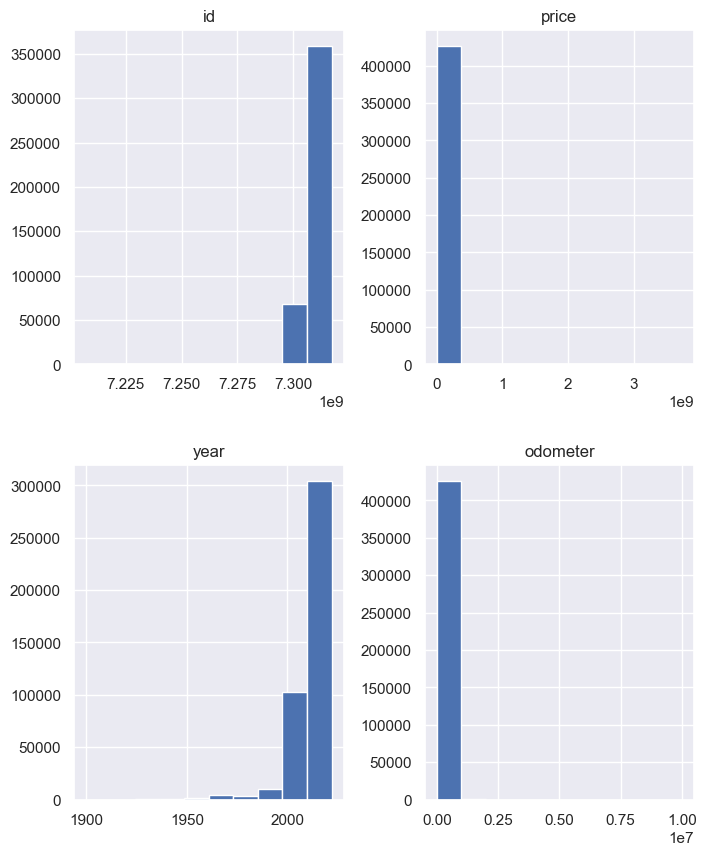

In [27]:
#S T A T I S T I C S (EDA)
#GRAPHICAL REPRESENTATION
#Histogram for all columns
import matplotlib.pyplot as plt

cardf.hist(figsize=(8, 10), bins=10)
plt.subplots_adjust(hspace=0.3, wspace=0.3)

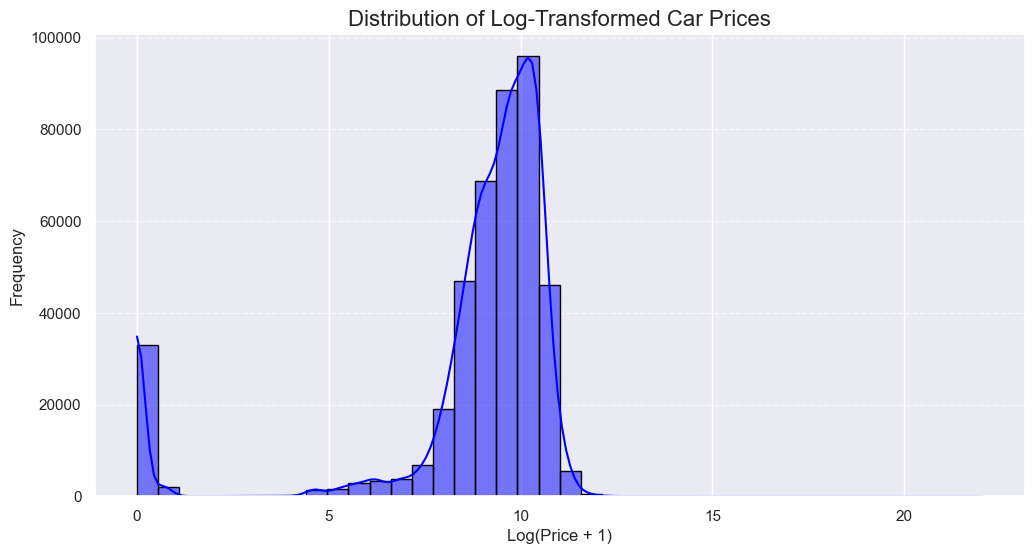

In [28]:
#EDA
#Distribution of Price: A histogram to see the spread of car prices.
# 1. Distribution of Price
# Log transformation to handle skewed data
cardf['log_price'] = np.log1p(cardf['price'])

# Improved histogram with log-transformed price
plt.figure(figsize=(12, 6))
sns.histplot(cardf['log_price'], bins=40, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Log-Transformed Car Prices', fontsize=16)
plt.xlabel('Log(Price + 1)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

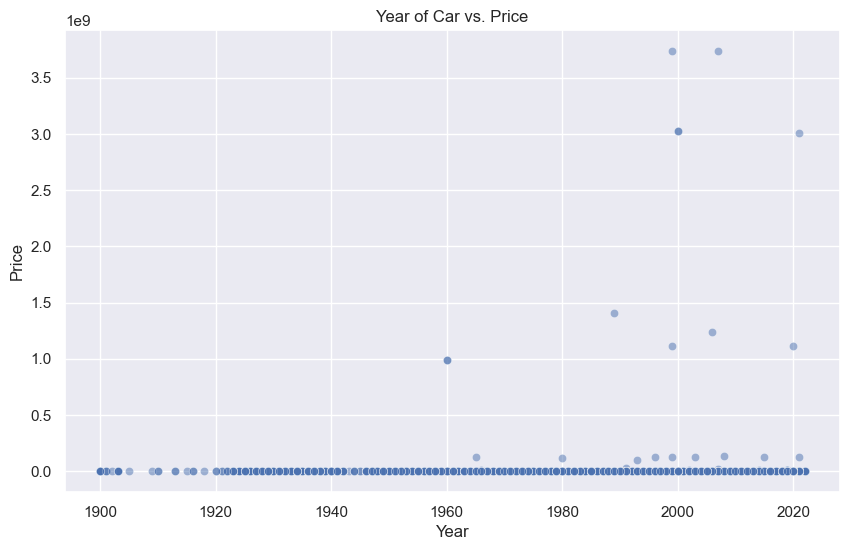

In [29]:
#EDA
#Year vs. Price: A scatter plot to observe any relationship between the year of the car and its price
# 2. Year vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cardf['year'], y=cardf['price'], alpha=0.5)
plt.title('Year of Car vs. Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

#Outliers: There are outliers in the year feature (e.g., very old cars). These may skew the model results if not handled.

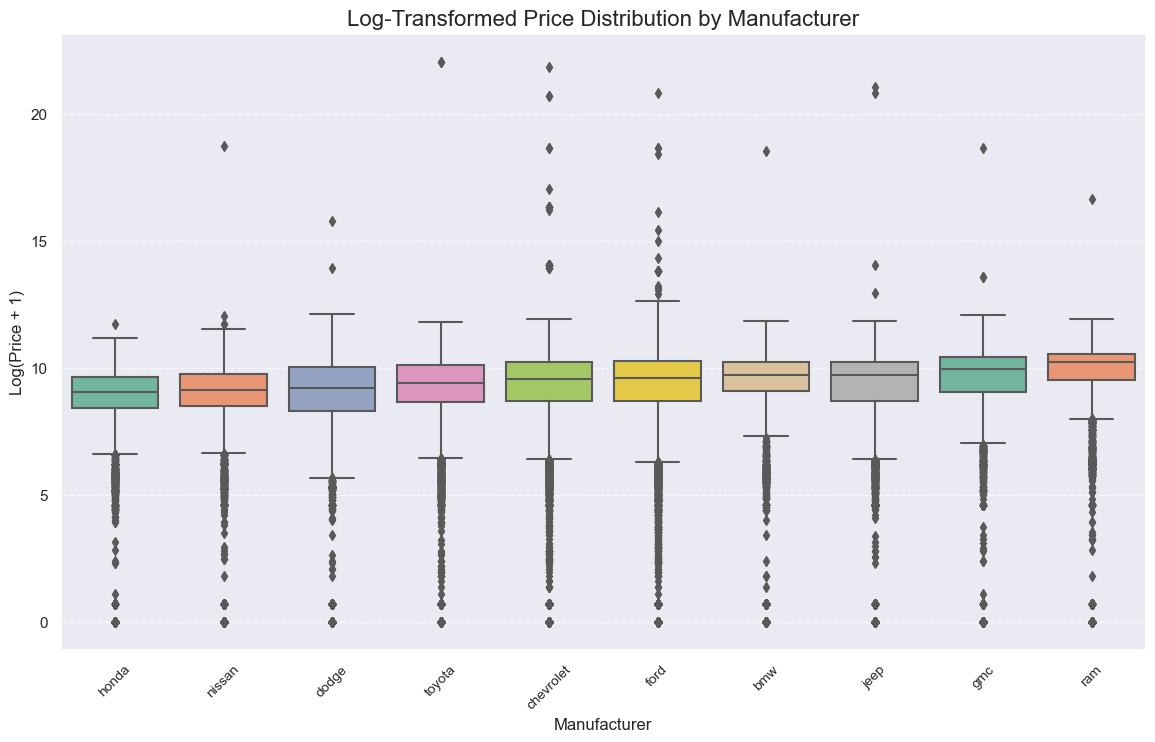

In [30]:
#EDA
#Box Plot of Price by Manufacturer: A box plot to see the price distribution for each manufacturer.
# 3. Box Plot of Price by Manufacturer
# Log-transform price for better visualization
cardf['log_price'] = np.log1p(cardf['price'])

# Top 10 manufacturers
top_manufacturers = cardf['manufacturer'].value_counts().nlargest(10).index

# Filter data for top manufacturers
filtered_data = cardf[cardf['manufacturer'].isin(top_manufacturers)]

# Calculate median price for sorting
median_price = filtered_data.groupby('manufacturer')['log_price'].median().sort_values()

# Improved box plot
plt.figure(figsize=(14, 8))
sns.boxplot(
    x='manufacturer', 
    y='log_price', 
    data=filtered_data, 
    order=median_price.index, 
    palette="Set2"
)
plt.title('Log-Transformed Price Distribution by Manufacturer', fontsize=16)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Log(Price + 1)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

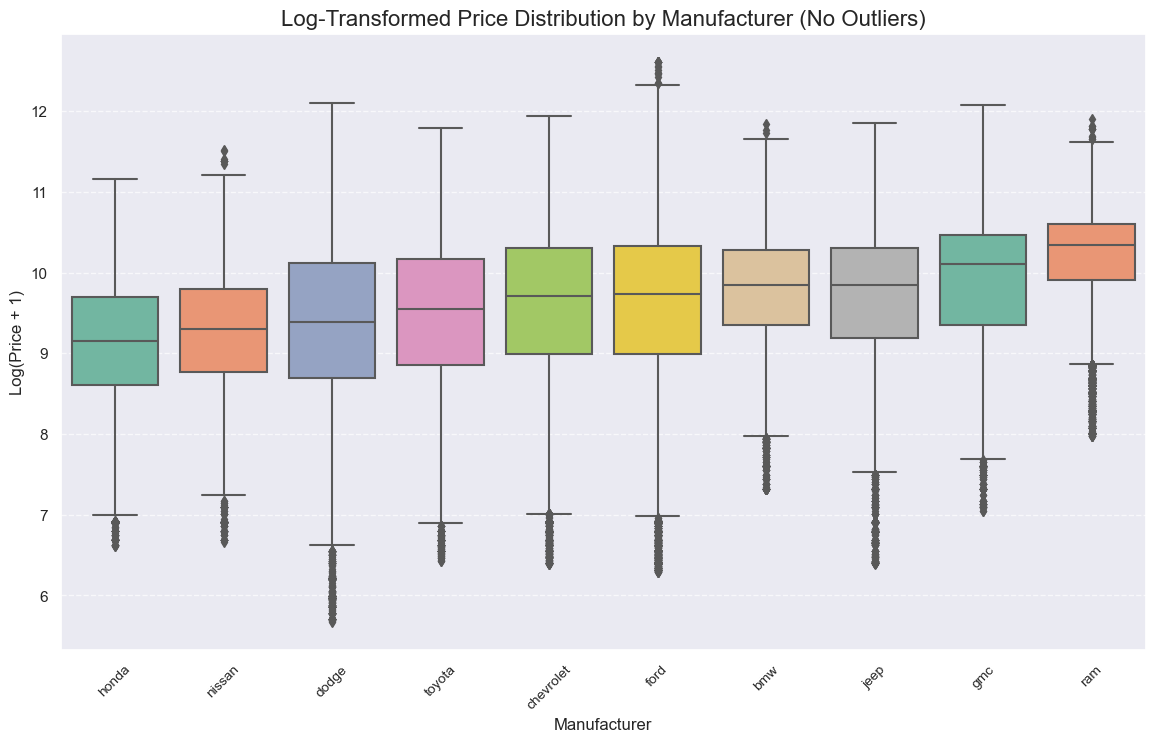

In [31]:
# Define a function to filter outliers for each group
def remove_outliers_by_iqr(df, column, groupby_col):
    filtered_df = pd.DataFrame()
    for group in df[groupby_col].unique():
        group_data = df[df[groupby_col] == group]
        Q1 = group_data[column].quantile(0.25)
        Q3 = group_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        filtered_group = group_data[(group_data[column] >= lower_bound) & (group_data[column] <= upper_bound)]
        filtered_df = pd.concat([filtered_df, filtered_group], axis=0)
    return filtered_df

# Remove outliers from the filtered data
filtered_data_no_outliers = remove_outliers_by_iqr(filtered_data, 'log_price', 'manufacturer')

# Recreate the box plot without outliers
median_price = filtered_data_no_outliers.groupby('manufacturer')['log_price'].median().sort_values()

plt.figure(figsize=(14, 8))
sns.boxplot(
    x='manufacturer', 
    y='log_price', 
    data=filtered_data_no_outliers, 
    order=median_price.index, 
    palette="Set2"
)
plt.title('Log-Transformed Price Distribution by Manufacturer (No Outliers)', fontsize=16)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Log(Price + 1)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


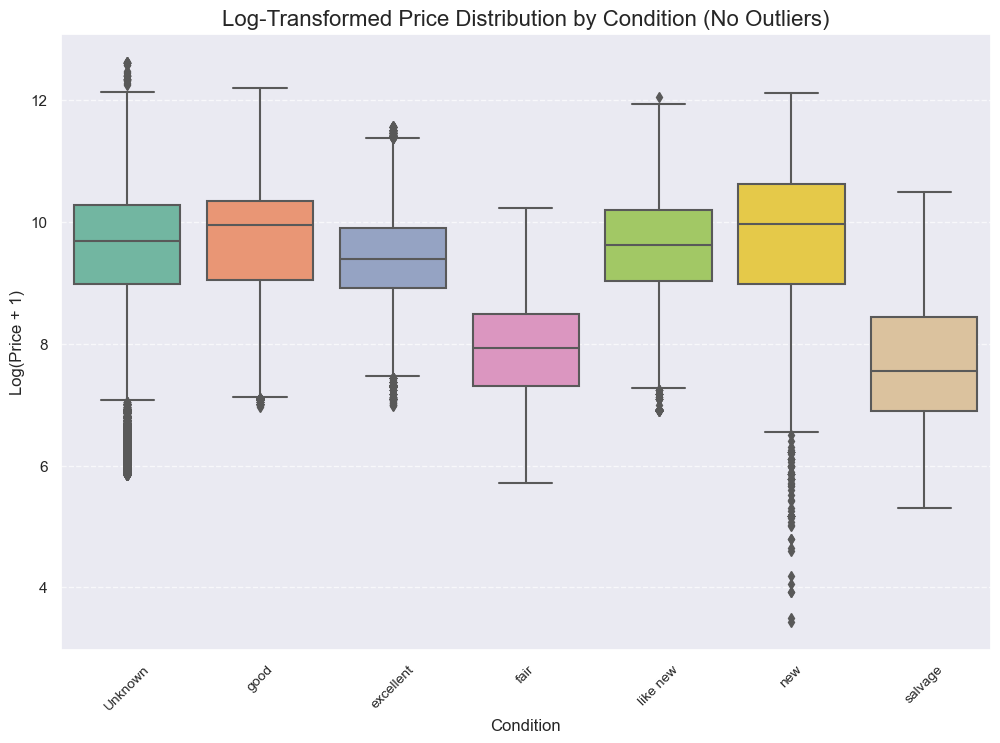

In [32]:
# Log-transforming price for better visualization
cardf['log_price'] = np.log1p(cardf['price'])

# Remove outliers using IQR for each 'condition' group
def remove_outliers_iqr(data, column, groupby_col):
    filtered_data = pd.DataFrame()
    for group in data[groupby_col].unique():
        group_data = data[data[groupby_col] == group]
        Q1 = group_data[column].quantile(0.25)
        Q3 = group_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        filtered_group = group_data[(group_data[column] >= lower_bound) & (group_data[column] <= upper_bound)]
        filtered_data = pd.concat([filtered_data, filtered_group], axis=0)
    return filtered_data

# Filter the data to remove outliers for the 'condition' group
filtered_cardf = remove_outliers_iqr(cardf, 'log_price', 'condition')

# Improved Box Plot of Price by Condition
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='condition', 
    y='log_price', 
    data=filtered_cardf, 
    palette="Set2"
)
plt.title('Log-Transformed Price Distribution by Condition (No Outliers)', fontsize=16)
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Log(Price + 1)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)
plt.show()

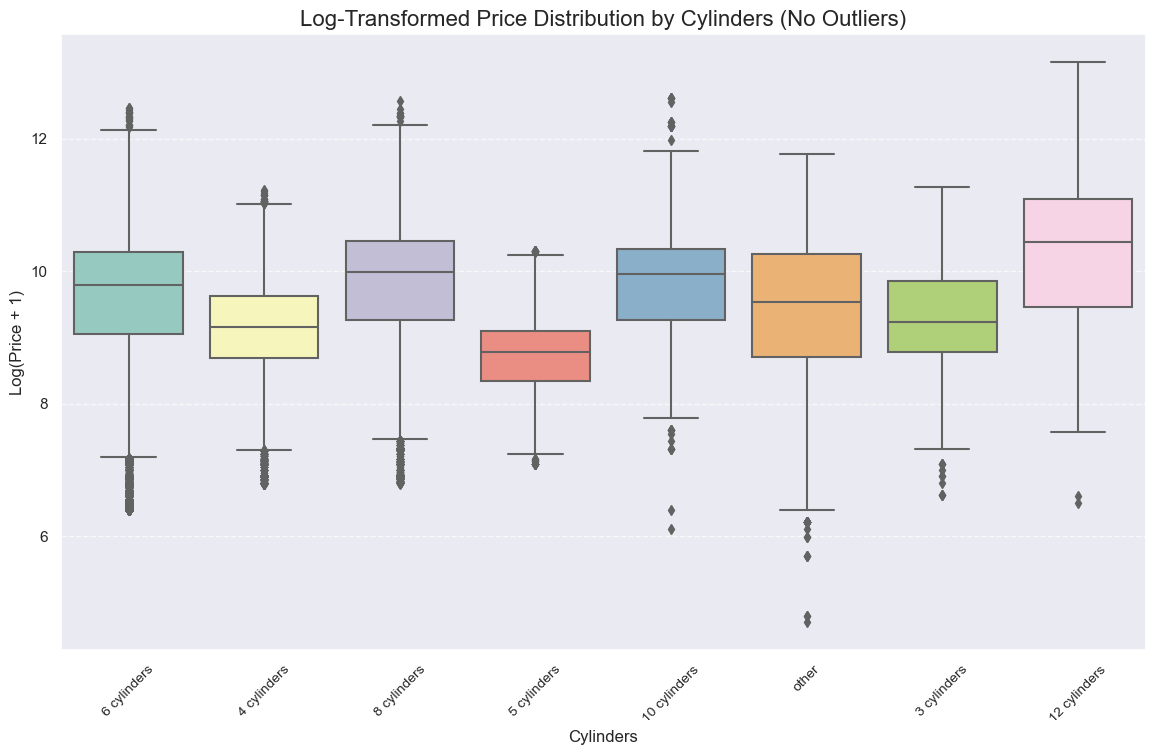

In [33]:
#EDA
#Cylinders vs. Price: A box plot to understand the impact of the number of cylinders on price.
# 5. Cylinders vs. Price
# Log-transforming price for better visualization
cardf['log_price'] = np.log1p(cardf['price'])

# Function to remove outliers by IQR
def remove_outliers_iqr(data, column, groupby_col):
    filtered_data = pd.DataFrame()
    for group in data[groupby_col].unique():
        group_data = data[data[groupby_col] == group]
        Q1 = group_data[column].quantile(0.25)
        Q3 = group_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        filtered_group = group_data[(group_data[column] >= lower_bound) & (group_data[column] <= upper_bound)]
        filtered_data = pd.concat([filtered_data, filtered_group], axis=0)
    return filtered_data

# Remove outliers for 'cylinders' group
filtered_cardf = remove_outliers_iqr(cardf, 'log_price', 'cylinders')

# Sort cylinders logically
cylinders_order = filtered_cardf['cylinders'].value_counts().index

# Improved box plot
plt.figure(figsize=(14, 8))
sns.boxplot(
    x='cylinders', 
    y='log_price', 
    data=filtered_cardf, 
    order=cylinders_order, 
    palette="Set3"
)
plt.title('Log-Transformed Price Distribution by Cylinders (No Outliers)', fontsize=16)
plt.xlabel('Cylinders', fontsize=12)
plt.ylabel('Log(Price + 1)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)
plt.show()


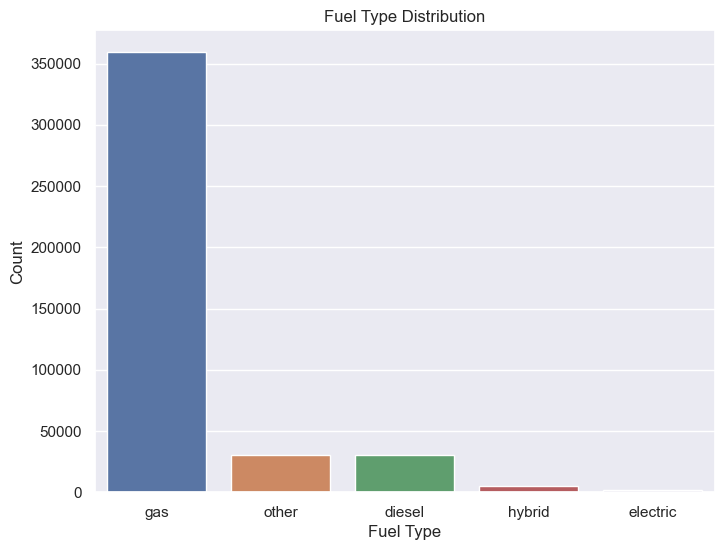

In [34]:
#EDA
#Fuel Type Distribution: A bar plot to show the counts of different fuel types.
# 6. Fuel Type Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='fuel', data=cardf, order=cardf['fuel'].value_counts().index)
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

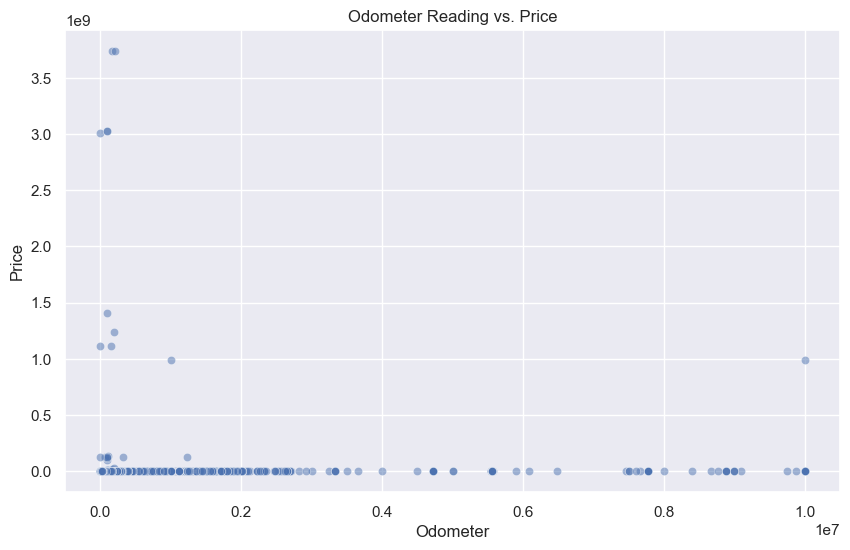

In [35]:
#EDA
#Odometer vs. Price: A scatter plot to examine the relationship between odometer readings and price
# 7. Odometer vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cardf['odometer'], y=cardf['price'], alpha=0.5)
plt.title('Odometer Reading vs. Price')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.show()

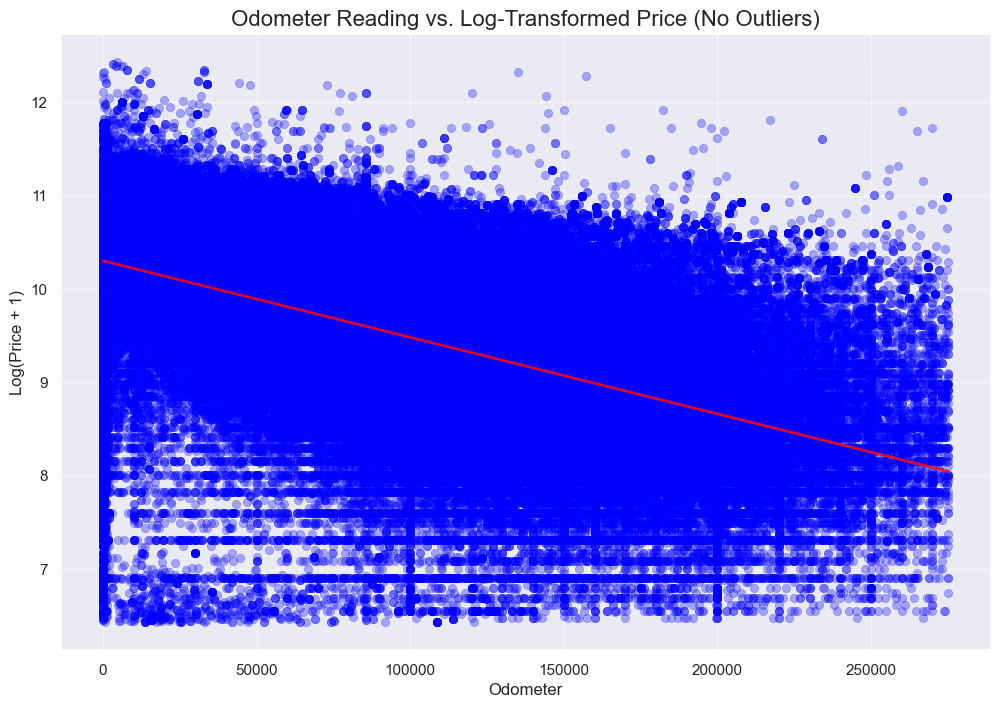

In [36]:
import numpy as np

# Log-transforming price for better visualization
cardf['log_price'] = np.log1p(cardf['price'])

# Removing outliers for both odometer and log_price using IQR
def remove_outliers_iqr_scatter(data, x_col, y_col):
    Q1_x, Q3_x = data[x_col].quantile(0.25), data[x_col].quantile(0.75)
    Q1_y, Q3_y = data[y_col].quantile(0.25), data[y_col].quantile(0.75)
    IQR_x, IQR_y = Q3_x - Q1_x, Q3_y - Q1_y
    lower_bound_x, upper_bound_x = Q1_x - 1.5 * IQR_x, Q3_x + 1.5 * IQR_x
    lower_bound_y, upper_bound_y = Q1_y - 1.5 * IQR_y, Q3_y + 1.5 * IQR_y
    return data[(data[x_col] >= lower_bound_x) & (data[x_col] <= upper_bound_x) &
                (data[y_col] >= lower_bound_y) & (data[y_col] <= upper_bound_y)]

filtered_cardf = remove_outliers_iqr_scatter(cardf, 'odometer', 'log_price')

# Improved scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='odometer', 
    y='log_price', 
    data=filtered_cardf, 
    alpha=0.3, 
    color='blue', 
    edgecolor=None
)
sns.regplot(
    x='odometer', 
    y='log_price', 
    data=filtered_cardf, 
    scatter=False, 
    color='red', 
    line_kws={"lw": 2, "alpha": 0.8}
)
plt.title('Odometer Reading vs. Log-Transformed Price (No Outliers)', fontsize=16)
plt.xlabel('Odometer', fontsize=12)
plt.ylabel('Log(Price + 1)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


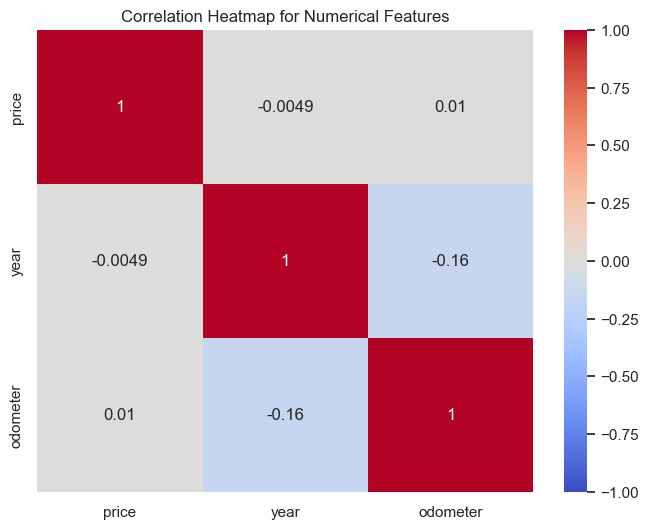

In [43]:
#EDA
#Correlation Heatmap:
#Displays correlations between numerical columns (price, year, odometer). This helps identify linear relationships, such as if newer or less driven cars have higher prices.
# 8. Correlation Heatmap
# Selecting only numeric columns for correlation analysis
numeric_columns = cardf[['price', 'year', 'odometer']]
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

In [38]:
#4. MODELING
    #LINEAR REGRESSION
    #Odometer (Mileage)
    #Reflects the car's mileage in wear and tear. Higer milage refrs to lower car value and leads to more cr maintenance and decrease reliability.

    #Year (Age)
    #The manufacturing year indicates the car's age, which affects its market value. Newer cars tend to retain higher value due to updated features, warranty coverage, and lower wear and tear.

    #For future consideration: these variables can improve the model.
        #Model: Captures the specifics of the car.
        ##Condition: Describes the current state of the car.
        #Fuel Type: Indicates operational costs and efficiency.
        #Cylinders: Provides insight into engine size and performance.

In [39]:
#LINEAR REGRESSION
# Importing necessary libraries
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, r2_score
#import numpy as np

# Features and target
#X = cardf[['odometer', 'year' , ]]  # Example features
#y = cardf['log_price']  # Log-transformed price as target

# Splitting data into training and testing sets
#Splits the data into 80% training and 20% testing for evaluation.
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the linear regression model
#model = LinearRegression() #LinearRegression() initializes the linear regression model.
#model.fit(X_train, y_train) #trains the model on the training data.
#Simple linear model to predict the continuous target variable.
#Supports coefficient interpretation and baseline performance.

# Making predictions
#y_pred = model.predict(X_test) #generates predictions for the test set.

# Evaluating the model
#mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)

#print("Mean Squared Error:", mse) #Measures the average squared difference between actual and predicted values.
##print("R-squared:", r2) #Indicates how well the model explains the variability of the target variable.

# Displaying coefficients and intercept
#print("Coefficients:", model.coef_) #Display the learned coefficients and intercept to understand the impact of each feature.
#print("Intercept:", model.intercept_)

#Mean Squared Error: 7.60783104339437
#R-squared: 0.003479569897584245
#Coefficients: [-5.36598607e-07  9.19873565e-03]
#Intercept: -9.762552330643352#


Mean Squared Error: 7.60783104339437
R-squared: 0.003479569897584245
Coefficients: [-5.36598607e-07  9.19873565e-03]
Intercept: -9.762552330643352


In [40]:
#LINEAR REGRESSION
#MSE: A lower MSE indicates that the model's predictions are closer to the actual data. the value of 7.61 suggests the average squared error of the predictions, but its significance depends on the scale of your target variable.
#R-squared of approximately 0.0035 indicates that the model explains only 0.35% of the variance in the target variable. This suggests that the model has very little explanatory power and may not be capturing meaningful relationships.
#The first coefficient, -5.36598607e-07 (approximately 0), indicates a negligible or no relationship between that independent variable and the target.
#The second coefficient, 9.19873565e-03, suggests a small positive relationship with the corresponding independent variable.
#An intercept of -9.76 might not have practical meaning unless a zero value for all predictors is a valid scenario in the data

#These results suggest that this model is not performing well. The low R-squared value implies it explains very little of the variance in the target variable, and the MSE indicates significant errors in predictions. 
#The coefficients and intercept indicate the relationships in the model are weak or nonexistent.

In [44]:
#LINEAR REGRESSION
# Scatterplot of log_price vs odometer
#plt.figure(figsize=(12, 6))
#plt.subplot(1, 2, 1)  # Create a subplot for odometer
#sns.scatterplot(x=cardf['odometer'], y=cardf['log_price'])
#plt.title('Log Price vs Odometer')
#plt.xlabel('Odometer')
#plt.ylabel('Log Price')

# Scatterplot of log_price vs year
#plt.subplot(1, 2, 2)  # Create a subplot for year
#sns.scatterplot(x=cardf['year'], y=cardf['log_price'])
#plt.title('Log Price vs Year')
#plt.xlabel('Year')
#plt.ylabel('Log Price')

#plt.tight_layout()  # Adjust spacing to avoid overlap
#plt.show()

In [45]:
#LINEAR REGRESSION WITH ADDITIONAL FEAUTURES
# Select additional variables
selected_features = ['odometer', 'year', 'condition', 'fuel', 'manufacturer', 'transmission']

# Drop rows with missing values for the selected features
cardf_cleaned = cardf[selected_features + ['log_price']].dropna()

# One-hot encode categorical variables
cardf_encoded = pd.get_dummies(cardf_cleaned, columns=['condition', 'fuel', 'manufacturer', 'transmission'], drop_first=True)

# Features (X) and target (y)
X = cardf_encoded.drop(columns=['log_price'])
y = cardf_encoded['log_price']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression with Additional Features")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Linear Regression with Additional Features
Mean Squared Error: 7.182675167338498
R-squared: 0.059169097445075036


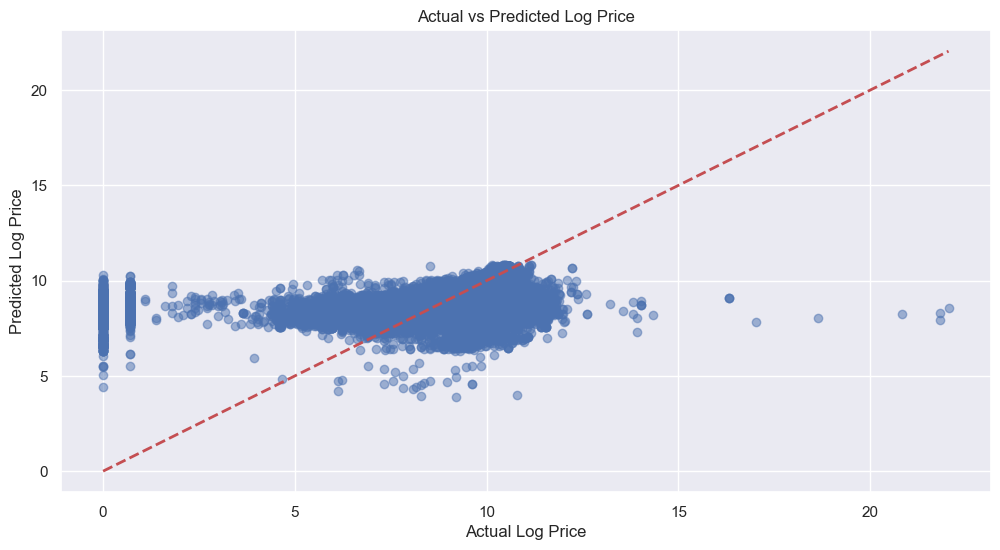

In [48]:
# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Log Price')
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Perfect prediction line
plt.show()

In [ ]:
#LINEAR REGRESSION WITH MORE VARIABLES ANALYSIS
#MSE: On average, the squared difference between the predicted and actual log-transformed price is approximately 7.18.
    #A smaller MSE value indicates a better fit, but without context (e.g., the range of log_price), it's hard to judge if this value is low enough.
#R2 indicates that approximately 5.92% of the variance in log_price is explained by the model with the selected features.This is a modest improvement compared to the earlier model (where 
    #𝑅2 was ~0.003), but it still suggests that most of the variance in log_price remains unexplained by the current features.

#The plot Actual vs. Predicted comparison measures how closely the predicted values from the regression model align with the actual target values in the test dataset.
#Actual Values:These are the true log_price values from test dataset (y_test).
#Predicted Values: These are the log_price values predicted by the trained linear regression model when applied to the test features (X_test).
#Purpose:The comparison highlights how accurate the model is in predicting the target variable.

In [46]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Ridge Regression
#Penalizes large coefficients with 𝐿2 regularization.
ridge = Ridge()
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Hyperparameter grid for regularization strength
#Hyperparameter alpha controls the strength of regularization:
#Higher alpha values increase regularization (shrink coefficients more).
#Lower alpha values decrease regularization (closer to standard linear regression).

ridge_cv = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')  # 5-fold cross-validation
ridge_cv.fit(X_train, y_train)

# Best Ridge model
best_ridge = ridge_cv.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

# Evaluate Ridge
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("Ridge Regression")
print(f"Best Alpha: {ridge_cv.best_params_['alpha']}")
print(f"Mean Squared Error: {ridge_mse}")
print(f"R-squared: {ridge_r2}")




c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=8.30101e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.04112e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge Regression
Best Alpha: 1
Mean Squared Error: 7.182552922782121
R-squared: 0.0591851097877788


In [ ]:
#Best Alpha: 1 best regularization strength for Ridge regression is 𝛼=1 balancing the trade-off between fitting the training data and controlling overfitting.
    #while regularization improves performance, overly penalizing coefficients (e.g., with a much larger 𝛼) does not help much.
#MSE: slightly better than that of the basic linear regression (without regularization), indicating that regularization slightly improved the model's performance.
#R-squared (𝑅2): approximately 5.92% of the variance in the log-transformed price.While this is a small improvement compared to linear regression (and slightly better than Lasso in this case), it still suggests that the features used are not fully capturing the relationship with the target variable.

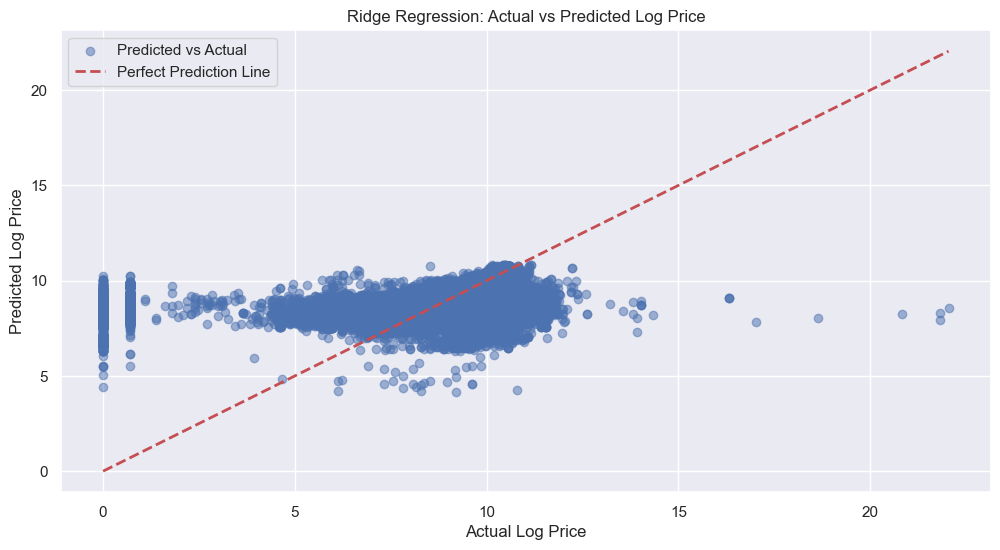

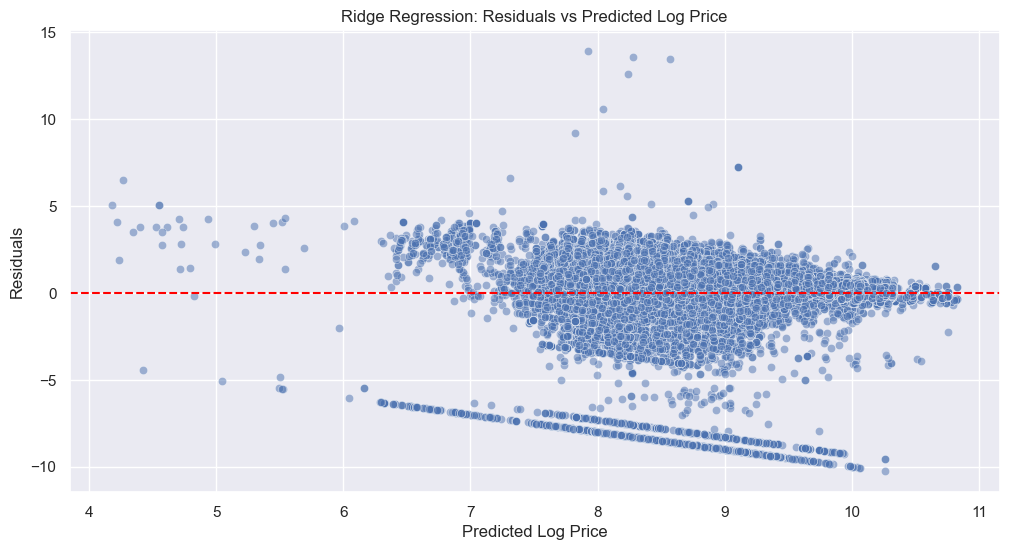

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set using the best Ridge model
y_pred_ridge = best_ridge.predict(X_test)

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction Line')
plt.title('Ridge Regression: Actual vs Predicted Log Price')
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.legend()
plt.show()

# Residual Plot: Residuals vs Predicted
residuals_ridge = y_test - y_pred_ridge

plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_pred_ridge, y=residuals_ridge, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Ridge Regression: Residuals vs Predicted Log Price')
plt.xlabel('Predicted Log Price')
plt.ylabel('Residuals')
plt.show()



In [47]:
# Lasso Regression
#Penalizes large coefficients with L1 regularization.
#Performs feature selection by shrinking some coefficients to zero
lasso = Lasso()
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Hyperparameter grid for regularization strength

lasso_cv = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')  # 5-fold cross-validation
lasso_cv.fit(X_train, y_train)
#Used to find the best value of alpha by cross-validating over a grid of values.

# Best Lasso model
best_lasso = lasso_cv.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)

# Evaluate Lasso
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression")
print(f"Best Alpha: {lasso_cv.best_params_['alpha']}")
print(f"Mean Squared Error: {lasso_mse}")
print(f"R-squared: {lasso_r2}")


Lasso Regression
Best Alpha: 0.01
Mean Squared Error: 7.250912828271038
R-squared: 0.05023090956553222


In [ ]:
#Best Alpha: 0.01 This indicates that a small amount of regularization
#MSE 7.2: slightly higher than that of Ridge regression, indicating that Lasso is slightly less effective for this dataset in minimizing errors.
#R-squared (𝑅2) 0.05: about 5.02% of the variance in the log-transformed price.

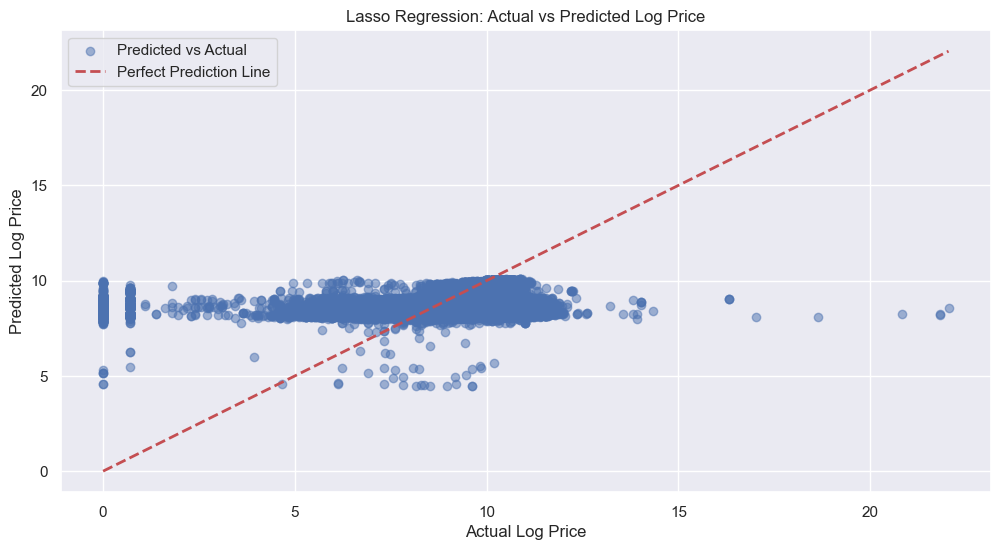

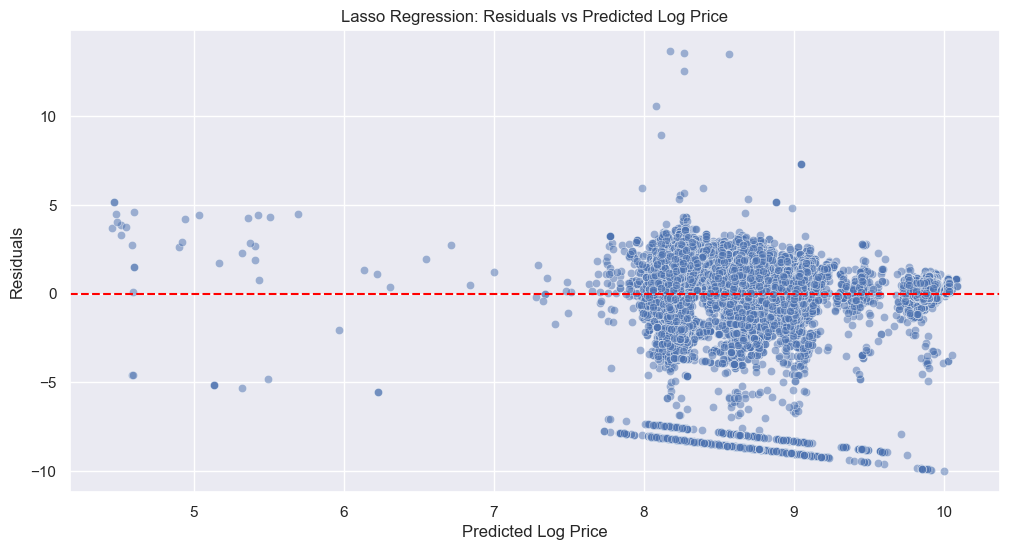

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set using the best Lasso model
y_pred_lasso = best_lasso.predict(X_test)

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction Line')
plt.title('Lasso Regression: Actual vs Predicted Log Price')
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.legend()
plt.show()

# Residual Plot: Residuals vs Predicted
residuals_lasso = y_test - y_pred_lasso

plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_pred_lasso, y=residuals_lasso, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Lasso Regression: Residuals vs Predicted Log Price')
plt.xlabel('Predicted Log Price')
plt.ylabel('Residuals')
plt.show()


In [52]:
#5. EVALUATION
# Get feature names and coefficients
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("Factors Influencing Car Price")
print(coefficients)

Factors Influencing Car Price
                         Feature   Coefficient
55            transmission_other  2.200276e+00
54           transmission_manual  1.459700e+00
53        transmission_automatic  1.282396e+00
22          manufacturer_ferrari  9.875613e-01
13     manufacturer_aston-martin  9.802927e-01
4                 condition_good  8.678582e-01
44          manufacturer_porsche  7.674409e-01
5             condition_like new  7.616652e-01
49            manufacturer_tesla  5.958811e-01
46            manufacturer_rover  5.744870e-01
2            condition_excellent  4.834030e-01
30           manufacturer_jaguar  3.999630e-01
14             manufacturer_audi  2.308012e-01
45              manufacturer_ram  2.297429e-01
20           manufacturer_datsun  2.261677e-01
12       manufacturer_alfa-romeo  2.072662e-01
25              manufacturer_gmc  1.904646e-01
35          manufacturer_lincoln  1.697895e-01
34            manufacturer_lexus  1.631412e-01
52            manufacturer_vol

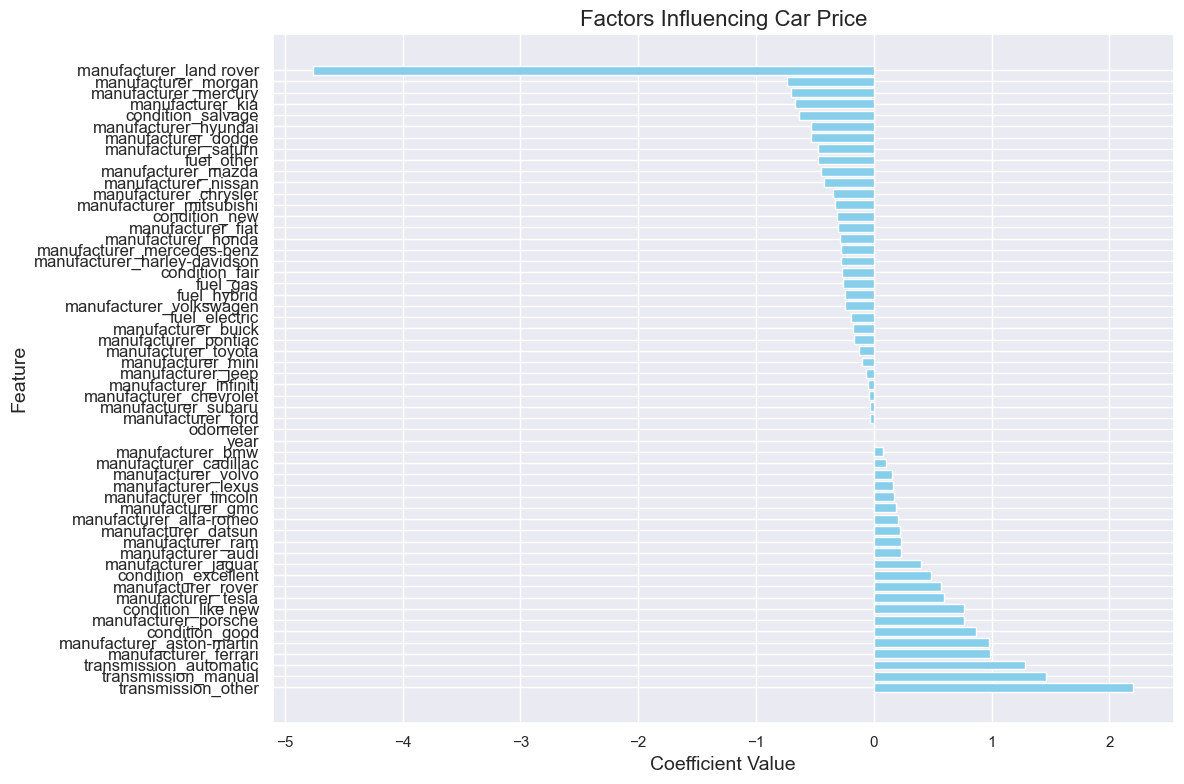

In [55]:
import matplotlib.pyplot as plt

# Plot coefficients
plt.figure(figsize=(12, 8))  # Increase figure size for better readability
plt.barh(coefficients['Feature'], coefficients['Coefficient'], color='skyblue')
plt.title('Factors Influencing Car Price', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Adjust y-axis label spacing
plt.yticks(fontsize=12, rotation=0)  # Ensure labels are horizontally aligned and large enough to read

# Add padding to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
#ANALYSIS
    #Positive Impact feautures influecing Price:
        #Transmission Types: transmission_other, transmission_manual, and transmission_automatic have high positive coefficients, indicating that these options significantly affect the price.
        #High-End Manufacturers: Brands like Ferrari, Aston-Martin, and Porsche contribute positively to price, which aligns with expectations.
        #Condition: Cars in "like new" or "excellent" condition are valued higher than those in poorer condition.
    #Negative Impact Feautures influencing price:
        #Manufacturer Land Rover: A significantly negative coefficient suggests that this brand is undervalued compared to others in the dataset.
        #Year: The small positive coefficient (3.594571e-03) shows that newer cars are slightly more expensive, but this feature may be dwarfed by others

    #Luxury manufacturers and better car conditions significantly increase prices.
    #Transmission types also play a significant role, with less common types being more expensive.
    #Outliers in features like year (e.g., very old cars) and price (e.g., cars with 0 price) may distort model performance.
    #Missing data in critical features (condition, drive, fuel, etc.) reduces the reliability of the analysis.

In [ ]:
#Reccomendations
    #Handle Missing Data: Impute missing values or drop rows where critical features like condition are missing.
    #Outlier Treatment:Remove or cap outliers in price, year, and odometer.
    #Non-Linear Models: Try tree-based models like Random Forest or Gradient Boosting to capture complex relationships.
    #Expand Features:Include features like drive, size, and type to improve model explanatory power.